# Lista 8: Métodos Iterativos para Sistema Lineares e Redução de Dados

**Professor:** Joao Antonio Recio Da Paixao  
**Aluno:** Eduardo Dias de Melo Catarina 

In [448]:
import Pkg; 

Pkg.add("Images")

using LinearAlgebra
using Images
using Printf

## Exercício 7.

Considere a imagem dada.

a) Insira esta imagem em uma matriz 5x5. Na imagem, 0 representa a cor preta, 0.5 a cor cinza e 1 representa a cor branca.

b) Qual é o posto da imagem?

c) Faça compressão de dados nível 1, 2, 3, 4 e 5 e imprima na tela com os seus erros.

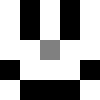

In [449]:
# a) Imagem em matriz 5x5

img = [
    1   0   1   0   1 ;
    1   0   1   0   1 ;
    1   1  0.5  1   1 ;
    0   1   1   1   0 ;
    1   0   0   0   1 ;
]

Gray.(img)

b) Posto da imagem

A imagem tem posto 3.

O posto de uma matriz é o número de linhas (ou colunas) linearmente independentes da matriz. Podemos descobrir o posto fazendo o escalonamento da matriz e verificando o número de linhas não nulas. Um problema que se encontra ao fazer isso neste exemplo, é que nos deparamos com a necessidade de realizar trocas de linhas. Como estamos tratando de um exemplo simples em uma imagem verticalmente simétrica, é trivial reconhecer as colunas linearmente independentes.

$
\begin{bmatrix}
1 & 0 & 1 & 0 & 1  \\
1 & 0 & 1 & 0 & 1  \\
1 & 1 & 0.5 & 1 & 1  \\
0 & 1 & 1 & 1 & 0  \\
1 & 0 & 0 & 0 & 1  \\
\end{bmatrix}
=
\begin{bmatrix}
1 & 0 & 1 \\
1 & 0 & 1 \\ 
1 & 1 & 0.5 \\
0 & 1 & 1 \\
1 & 0 & 0 \\
\end{bmatrix}
\cdot
\begin{bmatrix}
1 & 0 & 0 & 0 & 1 \\
0 & 1 & 0 & 1 & 0 \\
0 & 0 & 1 & 0 & 0 \\
\end{bmatrix}
$

In [450]:
# Verificamos a igualdade acima

A = [
    1 0 1   ;
    1 0 1   ;
    1 1 0.5 ;
    0 1 1   ;
    1 0 0   ;
]

B = [
    1 0 0 0 1 ;
    0 1 0 1 0 ;
    0 0 1 0 0 ;
]

norm(A * B - img)

0.0

In [451]:
# Julia possui uma função para determinar o posto de uma matriz

rank(img)

3

In [452]:
"""
RESUMO: É um método que dada uma matriz A, diminuirmos o tamanho delas através do cálculo de valores de c
        respeitando o modelo A = A-b*c', para conseguir várias matrizes até o posto desejado pelo usuário.
ENTRADA: matriz A e o nível de compressão
SAIDA: matriz B e matriz C
"""
#Retorna a melhor coordenada, tal que norm(A-b*c') é mínima
function melhores_coords(A,b) #retorna c tal que norm(A-b*c') é mínima
    m,n=size(A)
    A=1.0*A
    c=zeros(n,1)
    c=A'*(b/(b'*b))
    return c
end
#Faz cálculo b, c através das melhores coordenadas
function calculo_cb(A; limite = 22)
    n,m=size(A)

    b=randn(n,1)
    c=randn(m,1)
    
    btemp=randn(m,1)
    ctemp=randn(n,1)
    
    for i=1:limite
        c=melhores_coords(A,b)
        btemp=c
        ctemp=melhores_coords(A',btemp)
        b=ctemp
    end
    
    return b,c
end

function compressao(A,nivel)
    m,n=size(A)
    B=zeros(m,nivel)
    C=zeros(n,nivel)
    
    for i=1:nivel
        B[:,i],C[:,i]=calculo_cb(A)
        A=A-B[:,i]*C[:,i]'
    end
    return B,C
end

compressao (generic function with 1 method)

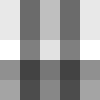

Compressão nível 1
Erro: 2.0639038137892203


In [453]:
println("Compressão nível 1")

B, C = compressao(img, 1)
compressao_1 = B * C'
erro_1 = norm(img - compressao_1)
display(Gray.(compressao_1))

println("Erro: ", erro_1)

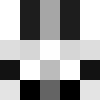

Compressão nível 2
Erro: 0.9834897575640652


In [454]:
println("Compressão nível 2")

B, C = compressao(img, 2)
compressao_2 = B * C'
erro_2 = norm(img - compressao_2)
display(Gray.(compressao_2))

println("Erro: ", erro_2)

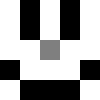

Compressão nível 3
Erro: 3.825842074281555e-16


In [455]:
println("Compressão nível 3")

B, C = compressao(img, 3)
compressao_3 = B * C'
erro_3 = norm(img - compressao_3)
display(Gray.(compressao_3))

println("Erro: ", erro_3)

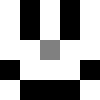

Compressão nível 4
Erro: 2.96432759488109e-16


In [456]:
println("Compressão nível 4")

B, C = compressao(img, 4)
compressao_4 = B * C'
erro_4 = norm(img - compressao_4)
display(Gray.(compressao_4))

println("Erro: ", erro_4)

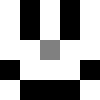

Compressão nível 5
Erro: 1.5871640720798593e-16


In [457]:
println("Compressão nível 5")

B, C = compressao(img, 5)
compressao_5 = B * C'
erro_5 = norm(img - compressao_5)
display(Gray.(compressao_5))

println("Erro: ", erro_5)

## Exercício 8.

Encontre (ou desenhe) uma imagem A, com mais ou menos 200 x 200 pixels (pode ser um pouco maior), que

a) Exija um nível de compressão maior que 3 e menor que 6 para recuperar pelo menos 99% de sua norma total.

b) Exija um nível de compressão maior que 40 para recuperar pelo menos 99% de sua norma total

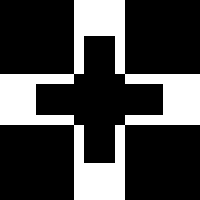

4

In [458]:
# a) Nível de compressão maior que 3 e menor que 6

img = zeros(200, 200)
img[75:125, :] .= 1
img[:, 75:125] .= 1
img[75:125, 75:125] .= 0
img[85:115, 37:163] .= 0
img[37:163, 85:115] .= 0

raw = img
img = Gray.(img)
display(img)

rank(raw)

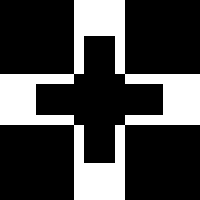

Compressão de nível 4
Erro: 1.6865334173677618e-13
Porcentagem da Norma: 100.00%


In [459]:
nivel_de_compressao = 4

println("Compressão de nível ", nivel_de_compressao)

B, C = compressao(raw, nivel_de_compressao)
img_comprimida = B * C'
erro = norm(Gray.(img) - img_comprimida)
display(Gray.(img_comprimida))

println("Erro: ", erro)
@printf("Porcentagem da Norma: %.2f%%\n", norm(img_comprimida) * 100 / norm(raw))

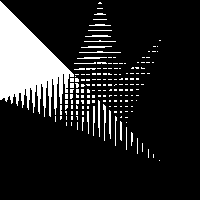

148

In [460]:
# b) Nível de compressão maior que 40

img = zeros(200, 200)
m, n = size(img)
for i=1:m
    for j=1:n
        img[i, j] = i > n/2 + sin(j/5*100)*n/5 * j/100 ? 0.0 : 1.0;
        img[j, i] -= i > n/2 + sin(j/5*100)*n/5 * j/100 ? 0.0 : 1.0;
        img[n-j+1, i] *= i > n/2 + sin(j/5*100)*n/5 * j/100 ? 0.0 : 1.0;
        img[j, m-i+1] -= i > n/2 + sin(j/5*100)*n/5 * j/100 ? 0.0 : 1.0;
    end
end
        

raw = img
img = Gray.(img)
display(img)

rank(raw)

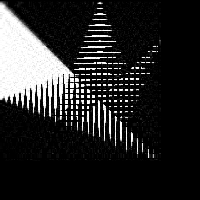

Compressão de nível 43
Erro: 11.936134573682942
Porcentagem da Norma: 99.03%


In [461]:
nivel_de_compressao = 43

println("Compressão de nível ", nivel_de_compressao)

B, C = compressao(raw, nivel_de_compressao)
img_comprimida = B * C'
erro = norm(Gray.(img) - img_comprimida)
display(Gray.(img_comprimida))

println("Erro: ", erro)
@printf("Porcentagem da Norma: %.2f%%\n", norm(img_comprimida) * 100 / norm(raw))

In [355]:
norm(img_comprimida)

218.6669423128777

In [356]:
norm(raw)

219.6228095235064